In [1]:
import pandas as pd

In [2]:
visitors = pd.read_excel('20102021_visitors.xlsx', header = 1, skipfooter=4, usecols='A:C,D:O')
visitors.drop(columns=['증감률(%)','증감률(%).1','증감률(%).2','증감률(%).3','증감률(%).4'], inplace=True)
visitors

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,인원수,인원수.1,인원수.2,인원수.3,인원수.4,인원수.5
0,2010,01,아시아,중국,91252,40425.0,11930.0,55.0,2751.0,36091.0
1,NaN,NaN,NaN,일본,209184,202825.0,1750.0,89.0,549.0,3971.0
2,NaN,NaN,NaN,대만,36399,35788.0,41.0,17.0,37.0,516.0
3,NaN,NaN,NaN,홍콩,14545,13874.0,55.0,NaN,21.0,595.0
4,NaN,NaN,NaN,마카오,554,554.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
9728,NaN,NaN,NaN,아프리카 기타,1050,135.0,123.0,74.0,49.0,669.0
9729,NaN,NaN,아프리카 소계,NaN,1177,149.0,126.0,76.0,49.0,777.0
9730,NaN,NaN,기타,국적미상,0,0.0,NaN,NaN,NaN,NaN
9731,NaN,NaN,기타 소계,NaN,0,0.0,NaN,NaN,NaN,NaN


## 데이터 전처리

In [3]:
# column 명 변경
visitors.columns=['연도','월','대륙','국적','계','관광','상용','공용','유학연수','기타']
visitors.head()

,연도,월,대륙,국적,계,관광,상용,공용,유학연수,기타
0,2010,01,아시아,중국,91252,40425.0,11930.0,55.0,2751.0,36091.0
1,NaN,NaN,NaN,일본,209184,202825.0,1750.0,89.0,549.0,3971.0
2,NaN,NaN,NaN,대만,36399,35788.0,41.0,17.0,37.0,516.0
3,NaN,NaN,NaN,홍콩,14545,13874.0,55.0,NaN,21.0,595.0
4,NaN,NaN,NaN,마카오,554,554.0,NaN,NaN,NaN,NaN


In [4]:
visitors['연도'] = visitors['연도'].fillna(method = 'ffill') 
visitors['월'] = visitors['월'].fillna(method = 'ffill') 
visitors['대륙'] = visitors['대륙'].fillna(method = 'ffill')

In [5]:
visitors.head()

,연도,월,대륙,국적,계,관광,상용,공용,유학연수,기타
0,2010,01,아시아,중국,91252,40425.0,11930.0,55.0,2751.0,36091.0
1,2010,01,아시아,일본,209184,202825.0,1750.0,89.0,549.0,3971.0
2,2010,01,아시아,대만,36399,35788.0,41.0,17.0,37.0,516.0
3,2010,01,아시아,홍콩,14545,13874.0,55.0,NaN,21.0,595.0
4,2010,01,아시아,마카오,554,554.0,NaN,NaN,NaN,NaN


In [6]:
# '국적' 컬럼에 NaN값이 있으면 그 행 제거
visitors.dropna(subset=['국적'], axis=0, inplace=True)

In [7]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8580 entries, 0 to 9732
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   연도      8580 non-null   object 
 1   월       8580 non-null   object 
 2   대륙      8580 non-null   object 
 3   국적      8580 non-null   object 
 4   계       8580 non-null   int64  
 5   관광      8433 non-null   float64
 6   상용      8316 non-null   float64
 7   공용      7290 non-null   float64
 8   유학연수    8199 non-null   float64
 9   기타      8554 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 737.3+ KB


In [8]:
visitors.describe()
# 평균적으로 관광을 목적으로 옴.

,계,관광,상용,공용,유학연수,기타
count,8580.000000,8433.000000,8316.000000,7290.000000,8199.000000,8554.000000
mean,15869.975058,12498.552710,272.920875,66.807545,293.571289,2992.806056
std,58050.770111,49370.365496,967.789969,264.258843,2018.189750,9505.235685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,777.000000,342.000000,13.000000,2.000000,7.000000,166.000000
50%,1749.000000,960.000000,40.000000,7.000000,26.000000,540.000000
75%,8030.500000,4069.000000,181.000000,28.000000,85.000000,1615.750000
max,917519.000000,823016.000000,25012.000000,3763.000000,44291.000000,137898.000000


In [9]:
visitors['국적'].unique()

array(['중국', '일본', '대만', '홍콩', '마카오', '필리핀', '인도네시아', '태국', '베트남', '인도',
       '말레이시아', '싱가포르', '몽골', '우즈베키스탄', '미얀마', 'GCC', '카자흐스탄', '터키',
       '캄보디아', '스리랑카', '방글라데시', '파키스탄', '이스라엘', '이란', '아시아 기타', '미국',
       '캐나다', '브라질', '멕시코', '아메리카 기타', '러시아', '영국', '독일', '프랑스', '이탈리아',
       '네덜란드', '우크라이나', '스페인', '루마니아', '노르웨이', '스웨덴', '폴란드', '스위스',
       '포르투갈', '오스트리아', '핀란드', '벨기에', '크로아티아', '그리스', '불가리아', '덴마크',
       '아일랜드', '유럽 기타', '오스트레일리아', '뉴질랜드', '오세아니아 기타', '남아프리카공화국',
       '아프리카 기타', '국적미상', '교포'], dtype=object)

In [10]:
visitors.tail()

,연도,월,대륙,국적,계,관광,상용,공용,유학연수,기타
9725,2021,11,오세아니아,오세아니아 기타,20,6.0,NaN,NaN,NaN,14.0
9727,2021,11,아프리카,남아프리카공화국,127,14.0,3.0,2.0,0.0,108.0
9728,2021,11,아프리카,아프리카 기타,1050,135.0,123.0,74.0,49.0,669.0
9730,2021,11,기타,국적미상,0,0.0,NaN,NaN,NaN,NaN
9732,2021,11,교포,교포,1404,NaN,NaN,NaN,NaN,1404.0


In [11]:
# 국적 관광객 비율
visitors['관광객비율(%)'] = round(visitors['관광'] / visitors['계'] * 100,1)
visitors.head()

,연도,월,대륙,국적,계,관광,상용,공용,유학연수,기타,관광객비율(%)
0,2010,01,아시아,중국,91252,40425.0,11930.0,55.0,2751.0,36091.0,44.3
1,2010,01,아시아,일본,209184,202825.0,1750.0,89.0,549.0,3971.0,97.0
2,2010,01,아시아,대만,36399,35788.0,41.0,17.0,37.0,516.0,98.3
3,2010,01,아시아,홍콩,14545,13874.0,55.0,NaN,21.0,595.0,95.4
4,2010,01,아시아,마카오,554,554.0,NaN,NaN,NaN,NaN,100.0


In [12]:
# 대륙별 관광객 비율 평균
visitors.pivot_table(values='관광객비율(%)', index='대륙', aggfunc='mean')

,관광객비율(%)
대륙,
기타,63.671631
아메리카,62.003916
아시아,53.188904
아프리카,42.198951
오세아니아,69.301865
유럽,58.796260


In [13]:
visitors_sum = visitors.groupby(['연도','월'])['관광'].sum() 
visitors_sum

연도    월 
2010  10    658244.0
      11    558324.0
      12    500389.0
      01    400818.0
      02    446525.0
              ...   
2021  05     15381.0
      06     17847.0
      07     20297.0
      08     18452.0
      09     19611.0
Name: 관광, Length: 143, dtype: float64

In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8580 entries, 0 to 9732
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   연도        8580 non-null   object 
 1   월         8580 non-null   object 
 2   대륙        8580 non-null   object 
 3   국적        8580 non-null   object 
 4   계         8580 non-null   int64  
 5   관광        8433 non-null   float64
 6   상용        8316 non-null   float64
 7   공용        7290 non-null   float64
 8   유학연수      8199 non-null   float64
 9   기타        8554 non-null   float64
 10  관광객비율(%)  8429 non-null   float64
dtypes: float64(6), int64(1), object(4)
memory usage: 804.4+ KB


In [15]:
visitors['기준년월'] = (visitors['연도'].astype('str')+'/' + visitors['월'].astype('str'))
visitors['기준년월']

0       2010/01
1       2010/01
2       2010/01
3       2010/01
4       2010/01
         ...   
9725    2021/11
9727    2021/11
9728    2021/11
9730    2021/11
9732    2021/11
Name: 기준년월, Length: 8580, dtype: object

In [16]:
visitors

,연도,월,대륙,국적,계,관광,상용,공용,유학연수,기타,관광객비율(%),기준년월
0,2010,01,아시아,중국,91252,40425.0,11930.0,55.0,2751.0,36091.0,44.3,2010/01
1,2010,01,아시아,일본,209184,202825.0,1750.0,89.0,549.0,3971.0,97.0,2010/01
2,2010,01,아시아,대만,36399,35788.0,41.0,17.0,37.0,516.0,98.3,2010/01
3,2010,01,아시아,홍콩,14545,13874.0,55.0,NaN,21.0,595.0,95.4,2010/01
4,2010,01,아시아,마카오,554,554.0,NaN,NaN,NaN,NaN,100.0,2010/01
...,...,...,...,...,...,...,...,...,...,...,...,...
9725,2021,11,오세아니아,오세아니아 기타,20,6.0,NaN,NaN,NaN,14.0,30.0,2021/11
9727,2021,11,아프리카,남아프리카공화국,127,14.0,3.0,2.0,0.0,108.0,11.0,2021/11
9728,2021,11,아프리카,아프리카 기타,1050,135.0,123.0,74.0,49.0,669.0,12.9,2021/11
9730,2021,11,기타,국적미상,0,0.0,NaN,NaN,NaN,NaN,NaN,2021/11


## 시각화

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
from matplotlib import font_manager, rc
path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = path).get_name()
rc('font', family=font_name)

In [19]:
condition = (visitors['국적'] == '중국')
visitors_filter = visitors[condition]
print(type(visitors_filter))
visitors_filter.head()

<class 'pandas.core.frame.DataFrame'>


,연도,월,대륙,국적,계,관광,상용,공용,유학연수,기타,관광객비율(%),기준년월
0,2010,01,아시아,중국,91252,40425.0,11930.0,55.0,2751.0,36091.0,44.3,2010/01
68,2010,02,아시아,중국,140571,60590.0,7907.0,68.0,29546.0,42460.0,43.1,2010/02
136,2010,03,아시아,중국,141457,50330.0,13549.0,174.0,14924.0,62480.0,35.6,2010/03
204,2010,04,아시아,중국,147680,84252.0,13306.0,212.0,2199.0,47711.0,57.1,2010/04
272,2010,05,아시아,중국,154066,89056.0,12325.0,360.0,2931.0,49394.0,57.8,2010/05


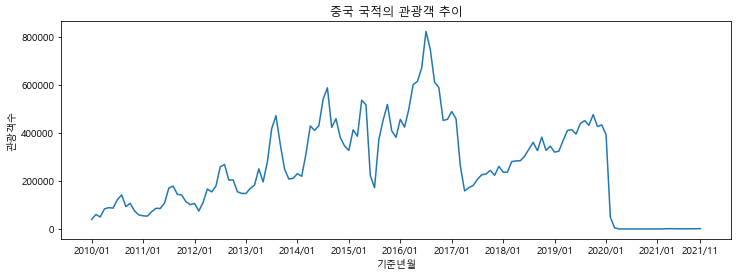

In [20]:
plt.figure(figsize = (12,4))
plt.plot(visitors_filter['기준년월'], visitors_filter['관광'])
plt.title('중국 국적의 관광객 추이')
plt.xlabel('기준년월')
plt.ylabel('관광객수')
plt.xticks(['2010/01','2011/01','2012/01','2013/01','2014/01','2015/01','2016/01','2017/01','2018/01','2019/01','2020/01','2021/01','2021/11'])
plt.show()

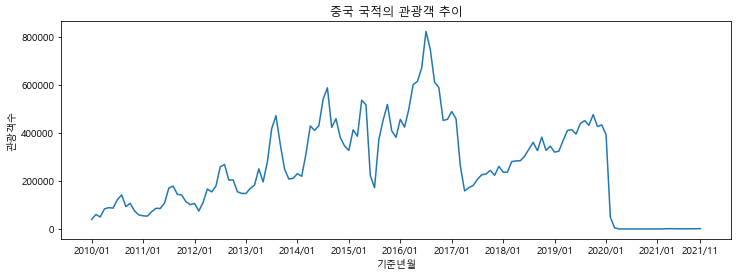

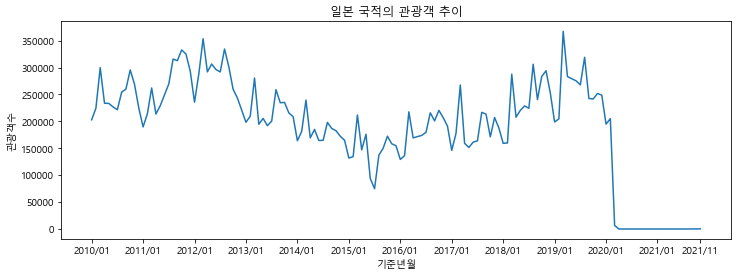

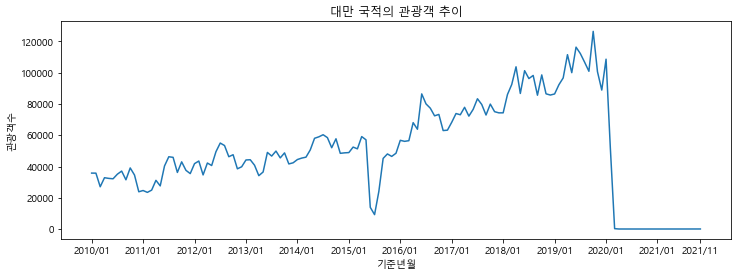

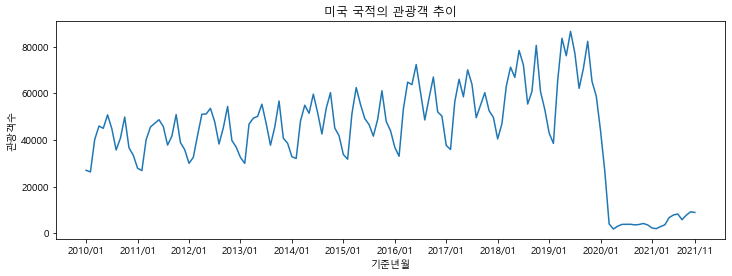

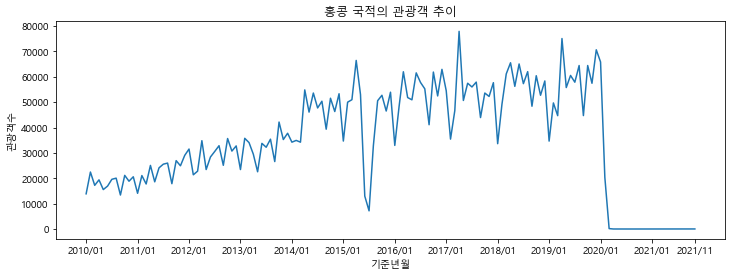

In [21]:
cntry_list = ['중국','일본','대만','미국','홍콩']
for cntry in cntry_list:
    condition = (visitors['국적'] == cntry)
    visitors_filter = visitors[condition]
    
    plt.figure(figsize = (12,4))
    plt.plot(visitors_filter['기준년월'], visitors_filter['관광'])
    plt.title('{} 국적의 관광객 추이'.format(cntry))
    plt.xlabel('기준년월')
    plt.ylabel('관광객수')
    plt.xticks(['2010/01','2011/01','2012/01','2013/01','2014/01','2015/01','2016/01','2017/01','2018/01','2019/01','2020/01','2021/01','2021/11'])
    plt.show()

## 히트맵

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
condition = (visitors['국적'] == '중국')
visitors_filter = visitors[condition]
print(type(visitors_filter))
visitors_filter.head()

<class 'pandas.core.frame.DataFrame'>


,연도,월,대륙,국적,계,관광,상용,공용,유학연수,기타,관광객비율(%),기준년월
0,2010,01,아시아,중국,91252,40425.0,11930.0,55.0,2751.0,36091.0,44.3,2010/01
68,2010,02,아시아,중국,140571,60590.0,7907.0,68.0,29546.0,42460.0,43.1,2010/02
136,2010,03,아시아,중국,141457,50330.0,13549.0,174.0,14924.0,62480.0,35.6,2010/03
204,2010,04,아시아,중국,147680,84252.0,13306.0,212.0,2199.0,47711.0,57.1,2010/04
272,2010,05,아시아,중국,154066,89056.0,12325.0,360.0,2931.0,49394.0,57.8,2010/05


In [24]:
#visitors_filter.loc[:,'월'] = visitors_filter.loc[:,'월'].astype('int')

In [25]:
visitors_pivot = visitors_filter.pivot_table(values='관광', index='연도', columns='월')
print(type(visitors_pivot))
visitors_pivot

<class 'pandas.core.frame.DataFrame'>


월,10,11,12,01,02,03,04,05,06,07,08,09
연도,,,,,,,,,,,,
2010,107237.0,75686.0,58987.0,40425.0,60590.0,50330.0,84252.0,89056.0,87080.0,122432.0,142180.0,93545.0
2011,141824.0,113856.0,101605.0,55070.0,53863.0,72003.0,86397.0,85668.0,108060.0,170524.0,178937.0,144704.0
2012,204866.0,155503.0,148320.0,106606.0,74895.0,110965.0,166843.0,154841.0,179074.0,258907.0,268988.0,203857.0
2013,249850.0,208175.0,210950.0,148118.0,169395.0,182850.0,250549.0,196306.0,280319.0,417991.0,472005.0,353359.0
2014,459708.0,381118.0,345957.0,230706.0,219533.0,313400.0,429419.0,410971.0,429991.0,540683.0,588181.0,423133.0
2015,518651.0,409635.0,381722.0,327225.0,413096.0,386386.0,536428.0,517154.0,223101.0,172075.0,372990.0,453670.0
2016,588561.0,452082.0,456882.0,456636.0,424232.0,500018.0,601460.0,614636.0,671493.0,823016.0,747818.0,611538.0
2017,244541.0,223743.0,260983.0,489256.0,458952.0,263788.0,158784.0,172527.0,181507.0,207099.0,226153.0,229172.0
2018,382922.0,327664.0,345135.0,236825.0,237075.0,281020.0,283533.0,284317.0,303405.0,332657.0,360982.0,326438.0


In [26]:
visitors_pivot.columns

Index([10, 11, 12, '01', '02', '03', '04', '05', '06', '07', '08', '09'], dtype='object', name='월')

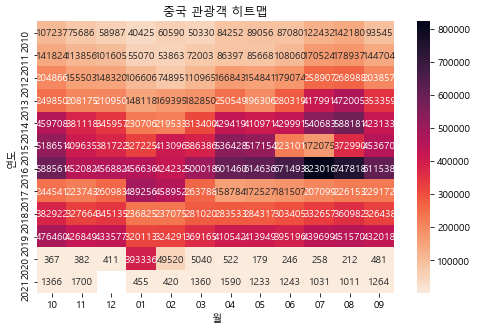

In [27]:
plt.figure(figsize=(8,5))
sns.heatmap(visitors_pivot, 
            annot=True,        # 각 간에 실제 값 표시
            fmt = '.0f',       # 소수점 없는 실수형
            cmap = 'rocket_r') # 그래프 색깔 조합 지정
plt.title('중국 관광객 히트맵')
plt.show()

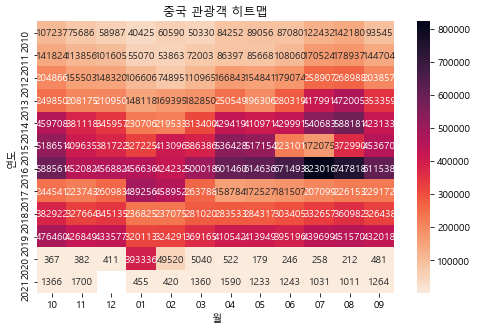

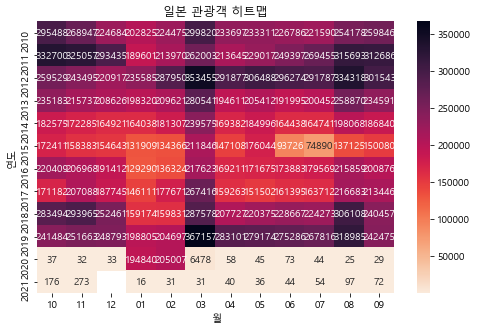

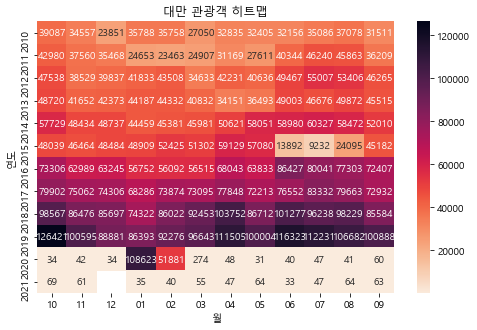

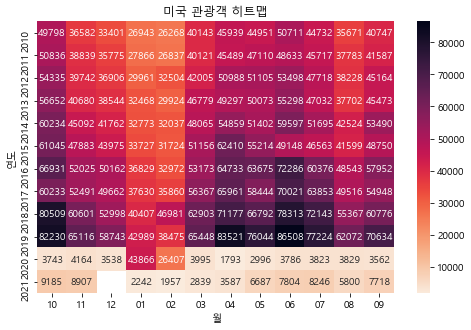

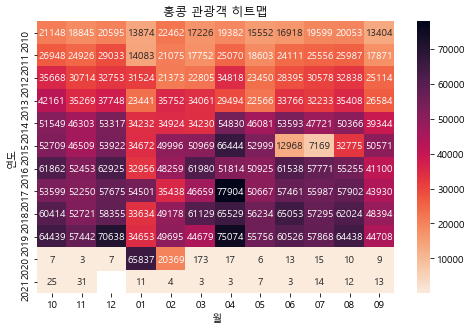

In [28]:
# 상위 5개국에 대한 히트맵 그리기
cntry_list = ['중국','일본','대만','미국','홍콩']
for cntry in cntry_list:
    condition = (visitors['국적'] == cntry)
    visitors_filter = visitors[condition]
    visitors_pivot = visitors_filter.pivot_table(values = '관광', index = '연도', columns='월')
    
    plt.figure(figsize=(8,5))
    sns.heatmap(visitors_pivot, annot=True, fmt = '.0f', cmap = 'rocket_r')
    plt.title('{} 관광객 히트맵'.format(cntry))
    plt.show()